<a href="https://colab.research.google.com/github/beatrizpinho04-debug/DACO/blob/main/Projeto_DACO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
base_path = '/content/drive/MyDrive/Dataset_BUSI_with_GT'
tumor_types = ["benign", "malignant", "normal"]

In [ ]:
image_paths = []
mask_paths = []
tumor_labels = []

for tumor in tumor_types:
    folder_path = os.path.join(base_path, tumor)

    if os.path.exists(folder_path):

        files = os.listdir(folder_path)

        image_files = [f for f in files if f.endswith(".png") and "_mask" not in f]

        for img_file in image_files:
            mask_file = img_file.replace(".png", "_mask.png")

            img_path = os.path.join(folder_path, img_file)
            mask_path = os.path.join(folder_path, mask_file)

            if os.path.exists(img_path) and os.path.exists(mask_path):
              image_paths.append(img_path)
              mask_paths.append(mask_path)
              tumor_labels.append(tumor)
            else:
                print(f"Missing pair for image: {img_path} or mask: {mask_path}")
    else:
        print(f"Folder not found: {folder_path}")

df = pd.DataFrame({
    "image_path": image_paths,
    "mask_path": mask_paths,
    "tumor_type": tumor_labels
})

In [ ]:
df

,image_path,mask_path,tumor_type
0,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,benign
1,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,benign
2,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,benign
3,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,benign
4,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,benign
...,...,...,...
775,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
776,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
777,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
778,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal


In [ ]:
df.shape

(780, 3)

In [ ]:
df.columns

Index(['image_path', 'mask_path', 'tumor_type'], dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
image_path,0
mask_path,0
tumor_type,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  780 non-null    object
 1   mask_path   780 non-null    object
 2   tumor_type  780 non-null    object
dtypes: object(3)
memory usage: 18.4+ KB


In [ ]:
df['tumor_type'].unique()

array(['benign', 'malignant', 'normal'], dtype=object)

In [ ]:
df['tumor_type'].value_counts()

,count
tumor_type,
benign,437
malignant,210
normal,133


/tmp/ipython-input-1283357677.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="tumor_type", palette="viridis", ax=ax)


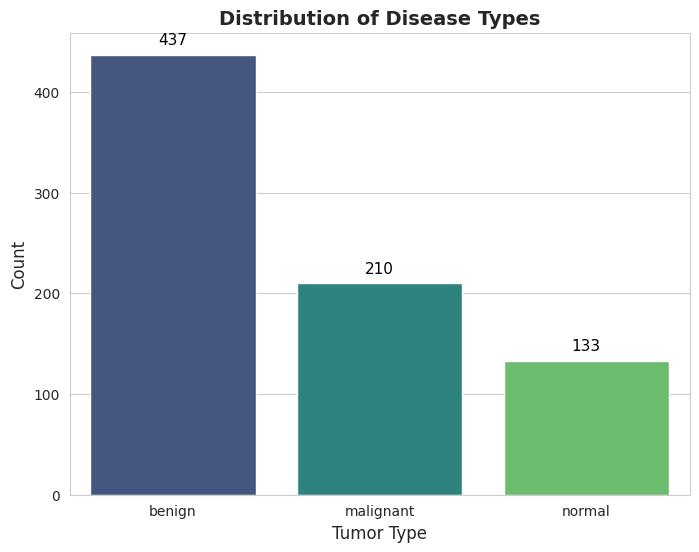

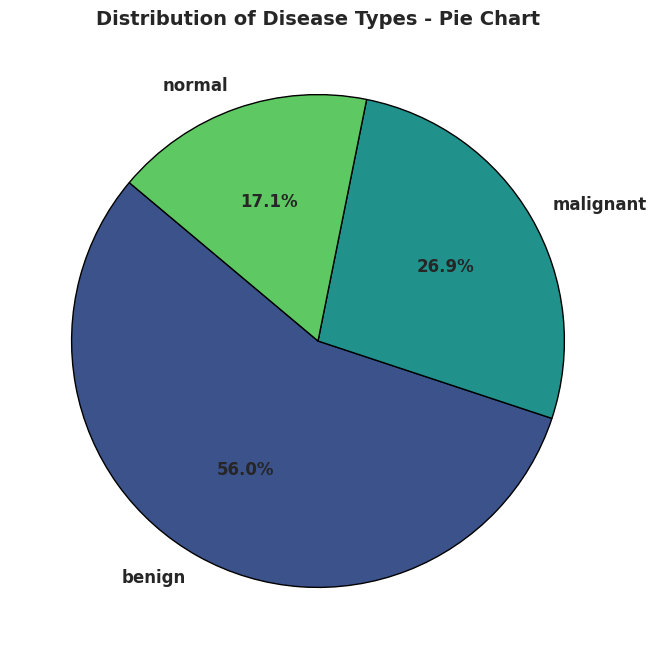

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="tumor_type", palette="viridis", ax=ax)

ax.set_title("Distribution of Disease Types", fontsize=14, fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.label_counts = df["tumor_type"].value_counts()

fig, ax = plt.subplots(figsize=(20, 8))
colors = sns.color_palette("viridis", len(plt.label_counts))

ax.pie(plt.label_counts, labels=plt.label_counts.index, autopct='%1.1f%%',
       startangle=140, colors=colors, textprops={'fontsize': 12, 'weight': 'bold'},
       wedgeprops={'edgecolor': 'black', 'linewidth': 1})

ax.set_title("Distribution of Disease Types - Pie Chart", fontsize=14, fontweight='bold')

plt.show()

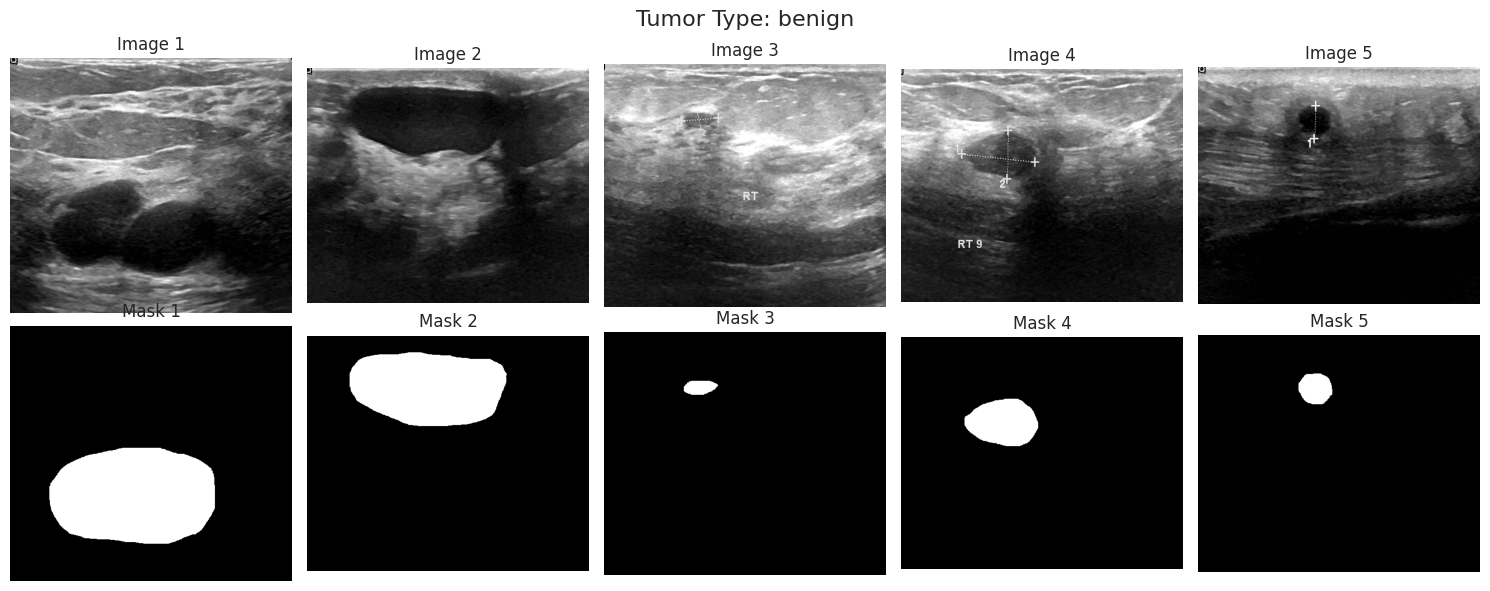

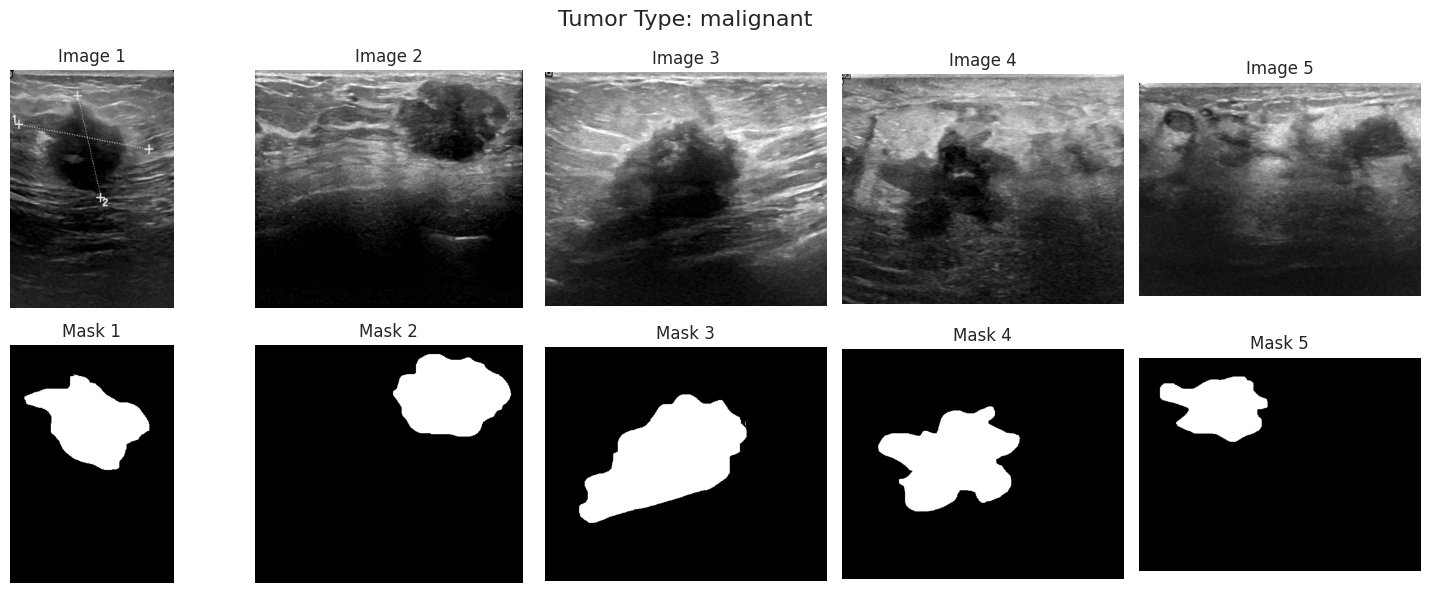

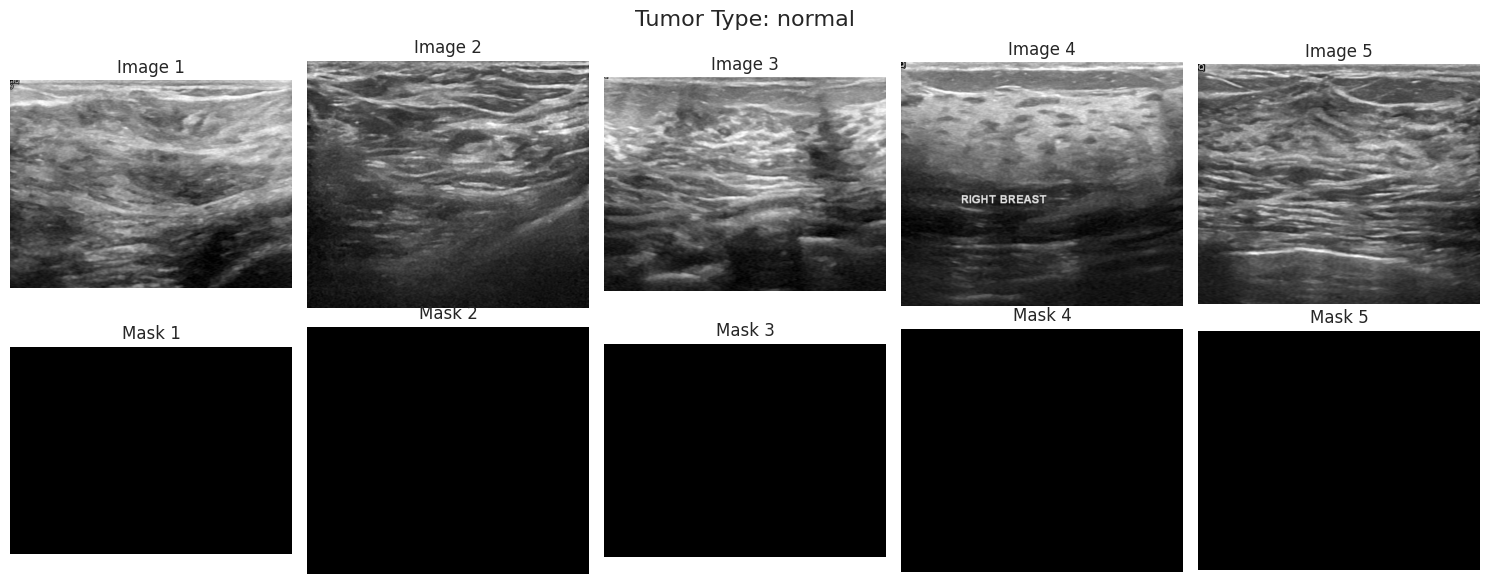

In [ ]:
import matplotlib.pyplot as plt
import cv2

n_samples = 5
tumor_types = df['tumor_type'].unique()

for tumor in tumor_types:
    subset = df[df['tumor_type'] == tumor].sample(n=min(n_samples, len(df[df['tumor_type'] == tumor])), random_state=42)

    fig, axs = plt.subplots(2, n_samples, figsize=(3 * n_samples, 6))
    fig.suptitle(f"Tumor Type: {tumor}", fontsize=16)

    for i, (idx, row) in enumerate(subset.iterrows()):
        image = cv2.imread(row['image_path'], cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(row['mask_path'], cv2.IMREAD_GRAYSCALE)

        axs[0, i].imshow(image, cmap='gray')
        axs[0, i].axis('off')
        axs[0, i].set_title(f"Image {i+1}")

        axs[1, i].imshow(mask, cmap='gray')
        axs[1, i].axis('off')
        axs[1, i].set_title(f"Mask {i+1}")

    plt.tight_layout()
    plt.show()

In [ ]:
df_benign = df[df["tumor_type"] == "benign"]
df_malignant = df[df["tumor_type"] == "malignant"]
df_normal = df[df["tumor_type"] == "normal"]

In [ ]:
max_size = max(len(df_benign), len(df_malignant), len(df_normal))

In [ ]:
from sklearn.utils import resample

df_malignant_oversampled = resample(df_malignant,
                                     replace=True,
                                     n_samples=max_size,
                                     random_state=42)
df_normal_oversampled = resample(df_normal,
                                    replace=True,
                                    n_samples=max_size,
                                    random_state=42)

In [ ]:
df_balanced = pd.concat([df_benign, df_malignant_oversampled, df_normal_oversampled])

In [ ]:
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df = df_balanced

In [ ]:
df

,image_path,mask_path,tumor_type
0,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
1,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
2,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,benign
3,/content/drive/MyDrive/Dataset_BUSI_with_GT/ma...,/content/drive/MyDrive/Dataset_BUSI_with_GT/ma...,malignant
4,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,benign
...,...,...,...
1306,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
1307,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
1308,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
1309,/content/drive/MyDrive/Dataset_BUSI_with_GT/ma...,/content/drive/MyDrive/Dataset_BUSI_with_GT/ma...,malignant


In [ ]:
df = df.drop(['mask_path'], axis = 1)

In [ ]:
df

,image_path,tumor_type
0,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
1,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
2,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,benign
3,/content/drive/MyDrive/Dataset_BUSI_with_GT/ma...,malignant
4,/content/drive/MyDrive/Dataset_BUSI_with_GT/be...,benign
...,...,...
1306,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
1307,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
1308,/content/drive/MyDrive/Dataset_BUSI_with_GT/no...,normal
1309,/content/drive/MyDrive/Dataset_BUSI_with_GT/ma...,malignant


In [ ]:
import cv2
from skimage.feature import graycomatrix, graycoprops
import numpy as np
import pandas as pd
import os

# --- CONFIGURAÇÃO ---
# Redimensionamento padrão para garantir uniformidade nas features
TARGET_SIZE = (128, 128)
LABELS = {'normal': 0, 'benign': 1, 'malignant': 2}

# 1. FUNÇÃO DE EXTRAÇÃO DE FEATURES
def extract_features(image_path):
    """
    Extrai features de Textura (GLCM) e Forma (Hu Moments) de uma imagem.
    Retorna uma lista de 13 features.
    """
    # Tenta ler a imagem
    img = cv2.imread(image_path)

    if img is None:
        print(f"Aviso: Não foi possível carregar a imagem em {image_path}")
        return None

    # Pré-processamento: Conversão para escala de cinza e redimensionamento
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_gray = cv2.resize(gray, TARGET_SIZE)

    features = []

    # A. Textura (GLCM - Gray Level Co-occurrence Matrix)
    # Distância 1, Ângulo 0 (horizontal). Níveis de cinza reduzidos para 32 para estabilidade e rapidez.
    # Quantize the image to the specified number of levels (0-31 for levels=32)
    img_quantized = (resized_gray // (256 // 32)).astype(np.uint8)
    g = graycomatrix(img_quantized, distances=[1], angles=[0], levels=32,
                     symmetric=True, normed=True)

    # Extrair 6 propriedades comuns de textura GLCM
    contrast = graycoprops(g, 'contrast')[0, 0]
    dissimilarity = graycoprops(g, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(g, 'homogeneity')[0, 0]
    energy = graycoprops(g, 'energy')[0, 0]
    correlation = graycoprops(g, 'correlation')[0, 0]
    ASM = graycoprops(g, 'ASM')[0, 0] # Angular Second Moment

    features.extend([contrast, dissimilarity, homogeneity, energy, correlation, ASM])

    # B. Forma (Hu Moments)
    # 7 invariantes de momento para descrição de forma
    moments = cv2.moments(resized_gray)
    hu_moments = cv2.HuMoments(moments)

    # Usar log para estabilizar os valores
    for i in range(0, 7):
        val = hu_moments[i][0]
        if np.abs(val) > 1e-6:
             hu_moments[i] = -1 * np.sign(val) * np.log10(np.abs(val))
        else:
             hu_moments[i] = 0

    features.extend(hu_moments.flatten().tolist()) # Total de 13 features

    return features


# 2. APLICAÇÃO DA EXTRAÇÃO AO DATAFRAME

all_features = []
# df é o seu DataFrame balanceado que contém a coluna 'image_path'
print("Iniciando a extração de features...")
for path in df['image_path']:
    features = extract_features(path)
    if features is not None:
        all_features.append(features)
    else:
        # Se a extração falhar (ex: imagem não encontrada), adiciona NaNs
        all_features.append([np.nan] * 13)

X = np.array(all_features)
# Mapear os rótulos de string (benign, malignant, normal) para inteiros (0, 1, 2)
y = df['tumor_type'].map(LABELS).values

# Remoção de NaNs (Linhas que falharam na extração)
# IMPORTANTE: Garantir que X e y têm o mesmo número de amostras
valid_rows = ~np.isnan(X).any(axis=1)
X = X[valid_rows]
y = y[valid_rows]

print("---")
print(f"✅ Extração de Features concluída.")
print(f"Dataset de Features (X): {X.shape[0]} amostras com {X.shape[1]} features.")
print(f"Rótulos (y): {y.shape[0]} amostras.")
print("As variáveis X e y estão prontas para o treino do SVM.")

Iniciando a extração de features...
---
✅ Extração de Features concluída.
Dataset de Features (X): 1311 amostras com 13 features.
Rótulos (y): 1311 amostras.
As variáveis X e y estão prontas para o treino do SVM.



--- INÍCIO DO TREINO DO SVM ---
Dimensão do conjunto de treino (X_train): (1048, 13)
Dimensão do conjunto de teste (X_test): (263, 13)

A realizar GridSearch para otimizar SVM (Kernel RBF)...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Melhores parâmetros encontrados: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Acurácia média do treino (cross-validation): 0.7672

              RESULTADOS FINAIS DO MODELO SVM (RBF)
              precision    recall  f1-score   support

      Normal       0.85      0.95      0.90        87
      Benign       0.86      0.68      0.76        88
   Malignant       0.85      0.92      0.89        88

    accuracy                           0.85       263
   macro avg       0.85      0.85      0.85       263
weighted avg       0.85      0.85      0.85       263



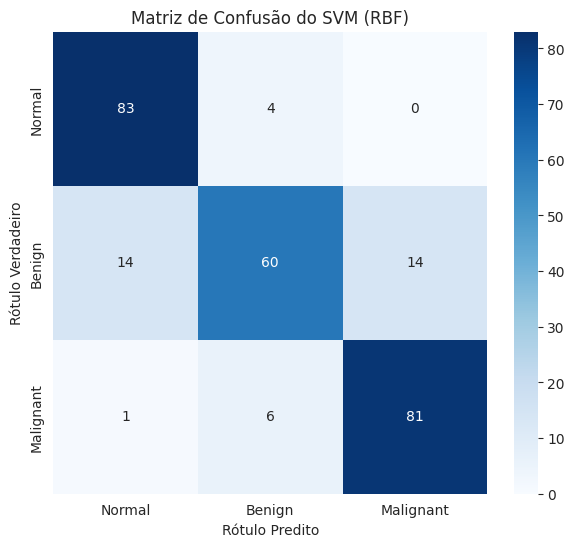

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Mapeamento de rótulos para interpretação dos resultados
LABEL_NAMES = {0: 'Normal', 1: 'Benign', 2: 'Malignant'}

# 1. Divisão dos Dados (80% treino, 20% teste)
# O stratify=y garante que a proporção de classes (já balanceada) é mantida em ambos os conjuntos.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n--- INÍCIO DO TREINO DO SVM ---")
print(f"Dimensão do conjunto de treino (X_train): {X_train.shape}")
print(f"Dimensão do conjunto de teste (X_test): {X_test.shape}")

# 2. Normalização/Escalonamento (IMPRESCINDÍVEL para SVM/RBF)
# O StandardScaler garante que todas as features contribuem igualmente para a distância,
# o que é vital para kernels baseados em distância como o RBF.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit e Transform no treino
X_test_scaled = scaler.transform(X_test)       # Apenas Transform no teste

# 3. Otimização de Hiperparâmetros (GridSearch)
# Definindo os parâmetros a serem testados
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parâmetro de regularização
    'gamma': [1, 0.1, 0.01, 0.001], # Parâmetro do Kernel RBF
    'kernel': ['rbf']
}

print("\nA realizar GridSearch para otimizar SVM (Kernel RBF)...")
# SVC: Support Vector Classification
# cv=5: Cross-validation de 5 folds
# n_jobs=-1: Usa todos os núcleos do processador (mais rápido)
svc = SVC(random_state=42)
grid_search = GridSearchCV(svc, param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# 4. Resultados da Otimização
best_svm = grid_search.best_estimator_
print(f"\nMelhores parâmetros encontrados: {grid_search.best_params_}")
print(f"Acurácia média do treino (cross-validation): {grid_search.best_score_:.4f}")

# 5. Avaliação do Modelo Final no Conjunto de Teste
y_pred = best_svm.predict(X_test_scaled)

# Relatório de Classificação e Matriz de Confusão
print("\n" + "="*70)
print("              RESULTADOS FINAIS DO MODELO SVM (RBF)")
print("="*70)
print(classification_report(y_test, y_pred, target_names=LABEL_NAMES.values()))
print("="*70)

# Visualização da Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=LABEL_NAMES.values(), yticklabels=LABEL_NAMES.values())
plt.title('Matriz de Confusão do SVM (RBF)')
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Predito')
plt.show()



              TREINO E AVALIAÇÃO: RANDOM FOREST (RF)
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Melhores parâmetros RF encontrados: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 200}
Acurácia média do treino (cross-validation): 0.8282
--- Random Forest Report (Test Set) ---
              precision    recall  f1-score   support

      Normal       0.95      0.94      0.95        87
      Benign       0.89      0.81      0.85        88
   Malignant       0.85      0.93      0.89        88

    accuracy                           0.89       263
   macro avg       0.90      0.89      0.89       263
weighted avg       0.90      0.89      0.89       263



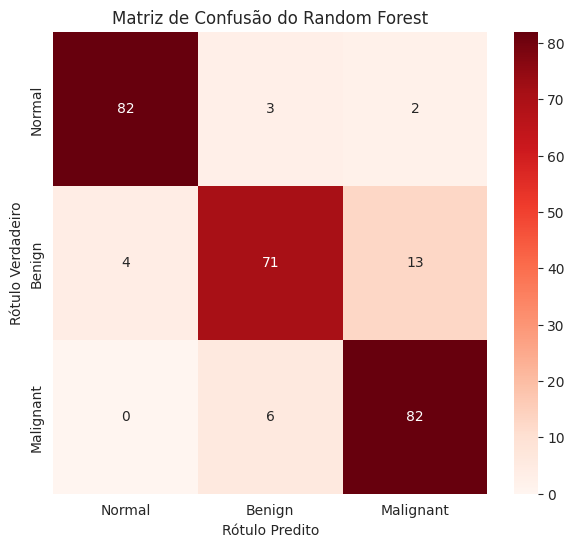

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Nota: As variáveis X_train_scaled, X_test_scaled, y_train, y_test e LABEL_NAMES são reutilizadas.
LABEL_NAMES_LIST = list(LABEL_NAMES.values())

print("\n\n" + "="*70)
print("              TREINO E AVALIAÇÃO: RANDOM FOREST (RF)")
print("="*70)

# Otimização de Hiperparâmetros (GridSearch)
# O RF é menos sensível à otimização fina que o SVM, mas estes parâmetros são cruciais.
rf_param_grid = {
    'n_estimators': [50, 100, 200], # Número de árvores no 'forest'
    'max_depth': [None, 10, 20],   # Profundidade máxima das árvores (None = sem limite)
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de amostras necessárias em um nó folha
}

rf_clf = RandomForestClassifier(random_state=42)
# Refit=True: O melhor modelo será treinado no conjunto completo de treino.
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, refit=True, verbose=1, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train_scaled, y_train)

best_rf = rf_grid_search.best_estimator_
rf_y_pred = best_rf.predict(X_test_scaled)

print(f"\nMelhores parâmetros RF encontrados: {rf_grid_search.best_params_}")
print(f"Acurácia média do treino (cross-validation): {rf_grid_search.best_score_:.4f}")
print("--- Random Forest Report (Test Set) ---")
print(classification_report(y_test, rf_y_pred, target_names=LABEL_NAMES_LIST))

# Visualização da Matriz de Confusão do RF
rf_cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=LABEL_NAMES_LIST, yticklabels=LABEL_NAMES_LIST)
plt.title('Matriz de Confusão do Random Forest')
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Predito')
plt.show()



             TREINO E AVALIAÇÃO: K-NEAREST NEIGHBORS (K-NN)
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Melhores parâmetros K-NN encontrados: {'n_neighbors': 3, 'weights': 'distance'}
Acurácia média do treino (cross-validation): 0.7872
--- K-NN Report (Test Set) ---
              precision    recall  f1-score   support

      Normal       0.83      0.98      0.89        87
      Benign       0.89      0.55      0.68        88
   Malignant       0.77      0.93      0.85        88

    accuracy                           0.82       263
   macro avg       0.83      0.82      0.81       263
weighted avg       0.83      0.82      0.81       263



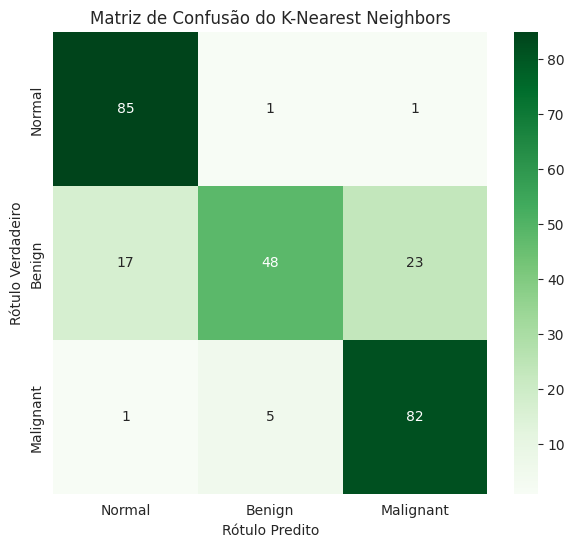

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Nota: As variáveis X_train_scaled, X_test_scaled, y_train, y_test e LABEL_NAMES são reutilizadas.
LABEL_NAMES_LIST = list(LABEL_NAMES.values())

print("\n\n" + "="*70)
print("             TREINO E AVALIAÇÃO: K-NEAREST NEIGHBORS (K-NN)")
print("="*70)

# Otimização de Hiperparâmetros (GridSearch)
# Os parâmetros mais cruciais são 'n_neighbors' (o número de vizinhos 'K') e 'weights'.
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9], # Testar diferentes valores para K
    'weights': ['uniform', 'distance'] # Uniforme: todos vizinhos contam igual; Distance: vizinhos mais próximos contam mais
}

knn_clf = KNeighborsClassifier()
# Refit=True: O melhor modelo será treinado no conjunto completo de treino.
knn_grid_search = GridSearchCV(knn_clf, knn_param_grid, refit=True, verbose=1, cv=5, n_jobs=-1)
knn_grid_search.fit(X_train_scaled, y_train)

best_knn = knn_grid_search.best_estimator_
knn_y_pred = best_knn.predict(X_test_scaled)

print(f"\nMelhores parâmetros K-NN encontrados: {knn_grid_search.best_params_}")
print(f"Acurácia média do treino (cross-validation): {knn_grid_search.best_score_:.4f}")
print("--- K-NN Report (Test Set) ---")
print(classification_report(y_test, knn_y_pred, target_names=LABEL_NAMES_LIST))

# Visualização da Matriz de Confusão do K-NN
knn_cm = confusion_matrix(y_test, knn_y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=LABEL_NAMES_LIST, yticklabels=LABEL_NAMES_LIST)
plt.title('Matriz de Confusão do K-Nearest Neighbors')
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Predito')
plt.show()

# **Segmentação das lesões + Visualização**

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Selecionar uma amostra para verificar a correspondência imagem/máscara
sample = df.sample(1).iloc[0]
img_raw = cv2.imread(sample['image_path'], cv2.IMREAD_GRAYSCALE)
mask_raw = cv2.imread(sample['mask_path'], cv2.IMREAD_GRAYSCALE)

# Redimensionamento para garantir uniformidade
img_res = cv2.resize(img_raw, (128, 128))
mask_res = cv2.resize(mask_raw, (128, 128))
_, binary_mask = cv2.threshold(mask_res, 127, 255, cv2.THRESH_BINARY)

# ROI: Isolar a lesão para remover ruído de fundo (speckle)
roi_segmentada = cv2.bitwise_and(img_res, img_res, mask=binary_mask)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_res, cmap='gray'); axs[0].set_title("Imagem Original")
axs[1].imshow(binary_mask, cmap='gray'); axs[1].set_title("Máscara (ROI)")
axs[2].imshow(roi_segmentada, cmap='gray'); axs[2].set_title("Lesão Isolada")
plt.show()

# **Extração de Features melhorada + Treino com Cross-Validation**

In [ ]:
import pandas as pd
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

def extract_features_v3(image_path, mask_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if img is None or mask is None: return None

    img = cv2.resize(img, (128, 128))
    mask = cv2.resize(mask, (128, 128))
    _, b_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    roi = cv2.bitwise_and(img, img, mask=b_mask)

    features = []

    # A. Textura GLCM (Focada na ROI) [cite: 27, 28]
    img_q = (roi // 8).astype(np.uint8)
    g = graycomatrix(img_q, [1], [0], levels=32, symmetric=True, normed=True)
    features.extend([graycoprops(g, 'contrast')[0, 0], graycoprops(g, 'homogeneity')[0, 0]])

    # B. LBP - Textura Local Robusta [cite: 87]
    lbp = local_binary_pattern(roi, 24, 3, method='uniform')
    (hist, _) = np.histogram(lbp[b_mask > 0].ravel(), bins=np.arange(0, 27), range=(0, 26))
    features.extend((hist / (hist.sum() + 1e-7)).tolist())

    # C. Análise de Bordas (Circularidade e Solidez) [cite: 88, 89]
    contours, _ = cv2.findContours(b_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        cnt = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt, True)
        circularity = (4 * np.pi * area) / (perimeter**2) if perimeter > 0 else 0
        hull = cv2.convexHull(cnt)
        solidity = area / cv2.contourArea(hull) if cv2.contourArea(hull) > 0 else 0
        features.extend([circularity, solidity])
    else:
        features.extend([0, 0])

    # D. Hu Moments (Forma Invariante) [cite: 27, 28]
    hu = cv2.HuMoments(cv2.moments(b_mask)).flatten()
    features.extend([-1 * np.sign(h) * np.log10(np.abs(h) + 1e-10) for h in hu])

    return features

# --- EXECUÇÃO ---
print("Processando extração V3...")
X_final = np.array([extract_features_v3(r.image_path, r.mask_path) for _, r in df.iterrows()])
y_final = df['tumor_type'].map({'normal': 0, 'benign': 1, 'malignant': 2}).values

# Divisão 80/20 Estratificada
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Modelos com Cross-Validation (cv=5) [cite: 30]
models = {
    "SVM (RBF)": GridSearchCV(SVC(random_state=42), {'C':[1, 10], 'gamma':[0.1, 0.01]}, cv=5),
    "Random Forest": GridSearchCV(RandomForestClassifier(random_state=42), {'n_estimators':[100, 200]}, cv=5),
    "K-NN": GridSearchCV(KNeighborsClassifier(), {'n_neighbors':[3, 5, 7]}, cv=5)
}

results_v3 = {}
for name, model in models.items():
    model.fit(X_train_sc, y_train)
    preds = model.predict(X_test_sc)
    results_v3[name] = {
        "Acc": accuracy_score(y_test, preds) * 100,
        "Rec": recall_score(y_test, preds, average=None)[2] * 100
    }

# **Gráfico de Importância das Features (Random Forest)**

In [ ]:
import seaborn as sns

# Extrair as importâncias do Random Forest (o melhor modelo)
# O GridSearchCV guarda o melhor modelo em .best_estimator_
best_rf = models["Random Forest"].best_estimator_
importances = best_rf.feature_importances_

# Criar lista com os nomes das features para o gráfico
feature_names = ['GLCM_Cont', 'GLCM_Homog'] + [f'LBP_{i}' for i in range(27)] + \
                ['Circularity', 'Solidity'] + [f'Hu_{i}' for i in range(7)]

# Criar DataFrame para facilitar a visualização
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(15) # Top 15

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='magma')
plt.title('Top 15 Features Mais Importantes (Random Forest V3)')
plt.xlabel('Nível de Importância')
plt.ylabel('Característica Extraída')
plt.show()

# **Matrizes de Confusão**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Criar área para 3 gráficos lado a lado
fig, axes = plt.subplots(1, 3, figsize=(21, 6))
label_names = ['Normal', 'Benigno', 'Maligno'] # Classes do Dataset BUSI

for i, (name, model) in enumerate(models.items()):
    preds = model.predict(X_test_sc)
    cm = confusion_matrix(y_test, preds)

    # Visualização da Matriz
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f'Matriz de Confusão: {name}')
    axes[i].grid(False)

plt.tight_layout()
plt.show()

# **Tabela Comparativa Final**

In [ ]:
fase_antes = {
    "SVM (RBF)": {"Acc": 85.0, "Rec": 92.0},
    "Random Forest": {"Acc": 89.0, "Rec": 93.2},
    "K-NN": {"Acc": 82.0, "Rec": 82.0}
}

comparativo = []
for n in models.keys():
    comparativo.append({
        "Modelo": n,
        "Acc Anterior (%)": fase_antes[n]["Acc"],
        "Acc Nova (%)": round(results_v3[n]["Acc"], 2),
        "Recall Mal. Antes (%)": fase_antes[n]["Rec"],
        "Recall Mal. Novo (%)": round(results_v3[n]["Rec"], 2)
    })

print("\n--- COMPARATIVO FINAL: METODOLOGIA ROI + BORDAS ---")
display(pd.DataFrame(comparativo))